# Шаг 1. Импортируйте необходимые библиотеки

In [136]:
import numpy as np
import pandas as pd

# Шаг 2. Импортируйте набор данных с этого [адреса]  (https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv).

In [137]:
pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv')
# pandas имеет возможность читать файлы прямо переходя по ссылке

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


# Шаг 3. Сохраните его в переменной с именем drinks

In [138]:
drinks = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv')
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [139]:
drinks.dropna(inplace = True) # удалил все NaN значения в таблице
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


# Шаг 4. На каком континенте в среднем пьют больше пива?

In [149]:
t = drinks.groupby('continent')['beer_servings'].mean()
Mean_data= pd.DataFrame(t)
Mean_data.rename(columns={'beer_servings': 'Mean_beer_serving'}, inplace=True)
Mean_data.index.name = 'Continent'
Mean_data

,Mean_beer_serving
Continent,
AF,61.471698
AS,37.045455
EU,193.777778
OC,89.687500
SA,175.083333


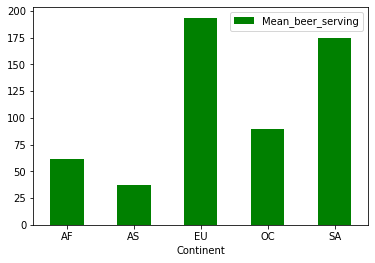

In [141]:
t = Mean_data.plot.bar(y='Mean_beer_serving', color = 'green',rot=0, use_index =True) #построим график для наглядности

# Шаг 5.  Для каждого континента вывести статистику по потреблению вина.

In [142]:
df = drinks.groupby(['continent']).agg({'wine_servings':['mean','median']}) # среднее и медиана переданые списком
df

wine_servings       
                   mean median
continent                     
AF            16.264151    2.0
AS             9.068182    1.0
EU           142.222222  128.0
OC            35.625000    8.5
SA            62.416667   12.0

# Шаг 6. Вывести среднее потребление алкоголя по каждому континенту по каждому столбцу

In [143]:
df1 = drinks.groupby('continent').agg('mean') # среднее по всем числовым столбцам
df1

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


# Шаг 7.  Вывести медианное потребление алкоголя по каждому континенту по каждому столбцу

In [144]:
df2 = drinks.groupby('continent').agg('median')
df2

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,32.0,3.0,2.0,2.30
AS,17.5,16.0,1.0,1.20
EU,219.0,122.0,128.0,10.00
OC,52.5,37.0,8.5,1.75
SA,162.5,108.5,12.0,6.85


# Шаг 8.  Вывести среднее, минимальное и максимальное значения для потребления напитков(столбец spirit).

In [145]:
drinks.spirit_servings.max()

373

In [146]:
drinks.spirit_servings.min()

0

In [147]:
drinks.spirit_servings.mean()

69.52941176470588